In [52]:
# Convex Optimization
# Tutorial 10
# Minimum time maneuver for a crane

import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from math import pi


In [53]:
# converting 15 degrees angle to radians system
theta = (15 * pi)/180
m = h = 0.1
t_temp = p_temp = 0
T_max = 2
bottom = 10
top = 50
g = np.array([[0], [-9.8]])
p_init = np.array([0, 0])
p_des = np.array([10, 2])

# columns matrices to multiply with T_left and T_right
Coeff = np.matrix([[-np.sin(theta), np.sin(theta)],
                   [np.cos(theta), np.cos(theta)]])


In [54]:
while not bottom + 1 == top:
  k = int((top + bottom) / 2)


  T = cp.Variable((2, k-1))
  V = cp.Variable((2, k))
  P = cp.Variable((2, k))
  F = (Coeff * T) + (m * np.tile(g, ((1, k-1))))

  Constraints = [0 <= T, T <= T_max, P[:, 0] == p_init, P[:, k-1] == p_des, 
                 V[:, 0] == 0, V[:, k-1] == 0, V[:, 1:k] == V[:, 0:k-1] + F, 
                 P[:, 1:k] == P[:, 0:k-1] + h*V[:, 0:k-1],]

  prob = cp.Problem(cp.Minimize(0), Constraints)
  optimum_value = prob.solve(solver=cp.ECOS, verbose=False)
  if optimum_value== 0:
    top = k
    t_temp = T.value
    p_temp = P.value
  else: 
    bottom = k

k = top

print(f'Minimum time required to reach the desired position: {k}')

Minimum time required to reach the desired position: 34


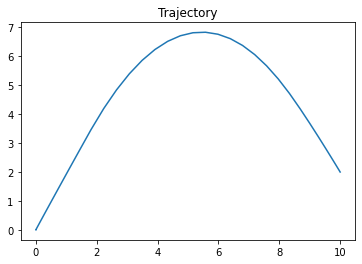

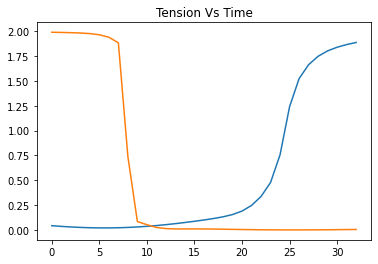

In [55]:
plt.figure()
plt.title('Trajectory')
plt.plot(p_temp[0,:].T, p_temp[1,:].T)

plt.figure()
plt.title('Tension Vs Time')
plt.plot(t_temp.T)

plt.show()